In [99]:
import pandas as pd
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

#get data
from vega_datasets import data

In [2]:
date = 'Jan 1 1970'

In [3]:
pd.to_datetime(date)

Timestamp('1970-01-01 00:00:00')

### Tell Pandas what format

In [5]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

### Coffee Consumption Data

In [6]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


In [7]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [8]:
type(df.iloc[1]['date'])

str

In [9]:
#Converting to date time
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [10]:
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

### .dt allows us to extract parts of the date

In [12]:
#year
df.date.dt.year.head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: date, dtype: int64

In [15]:
#Day
df.date.dt.day.head()

0    1
1    2
2    3
3    4
4    7
Name: date, dtype: int64

In [18]:
#Day Name
df.date.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

In [16]:
#Month
df.date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

In [19]:
#Add year to column
df['year'] = df.date.dt.year
df

,date,coffee_consumption,year
0,2019-01-01,14.301915,2019
1,2019-01-02,12.905900,2019
2,2019-01-03,10.046015,2019
3,2019-01-04,6.354805,2019
4,2019-01-07,8.545563,2019
...,...,...,...
256,2019-12-25,12.250875,2019
257,2019-12-26,7.513206,2019
258,2019-12-27,9.464345,2019
259,2019-12-30,14.623106,2019


In [20]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


### Working with more complicated data


In [21]:

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.columns = df.columns.str.lower()
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    23674 non-null  object 
 1   symbol  23674 non-null  object 
 2   close   23674 non-null  float64
 3   volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


<AxesSubplot:>

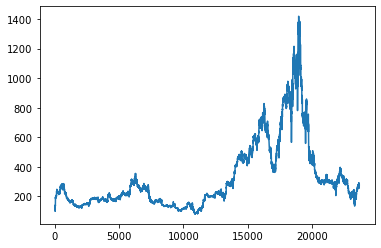

In [26]:
df.close.plot()

How do we make pandas time aware so we can utilize the built in functionality for time series analysis?
3 steps
* Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
* Set the datetime column as Index
* Sort the datetime index

In [27]:
# Using to date time to format
pd.to_datetime('2020-03-13 12-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 12:00:00')

In [28]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p')

In [31]:
#Set index
df = df.set_index('date').sort_index()
df

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81


<AxesSubplot:xlabel='date'>

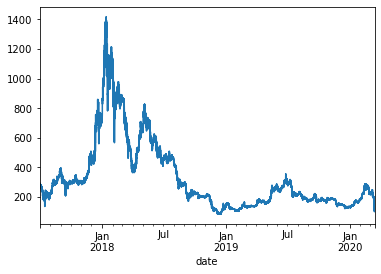

In [32]:
df.close.plot()

Let's look at the the mean on each day of the week

In [33]:
df.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=23674)

In [34]:
df['weekday_name'] = df.index.day_name()

In [35]:
df.head()

,symbol,close,volume,weekday_name
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [38]:
(df.weekday_name == 'Wednesday').mean()

0.1429416237222269

In [39]:
df.groupby('weekday_name').mean()

,close,volume
weekday_name,,
Friday,321.134596,2.135718e+06
Monday,326.186823,1.913387e+06
Saturday,327.707441,1.455576e+06
Sunday,326.316418,1.453492e+06
Thursday,323.334524,2.250669e+06
Tuesday,325.189722,2.355955e+06
Wednesday,324.622361,2.510756e+06


<AxesSubplot:xlabel='weekday_name'>

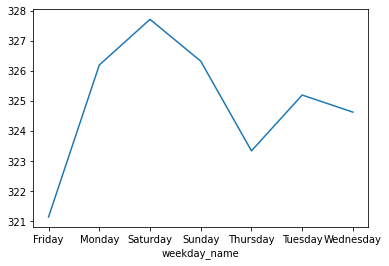

In [40]:
df.groupby('weekday_name').mean().close.plot()

<AxesSubplot:xlabel='weekday_name'>

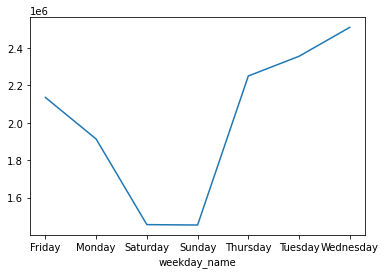

In [41]:
df.groupby('weekday_name').mean().volume.plot()

### The days are out of order so let's fix that

In [42]:
df.index

DatetimeIndex(['2017-07-01 11:00:00', '2017-07-01 12:00:00',
               '2017-07-01 13:00:00', '2017-07-01 14:00:00',
               '2017-07-01 15:00:00', '2017-07-01 16:00:00',
               '2017-07-01 17:00:00', '2017-07-01 18:00:00',
               '2017-07-01 19:00:00', '2017-07-01 20:00:00',
               ...
               '2020-03-13 11:00:00', '2020-03-13 12:00:00',
               '2020-03-13 13:00:00', '2020-03-13 14:00:00',
               '2020-03-13 15:00:00', '2020-03-13 16:00:00',
               '2020-03-13 17:00:00', '2020-03-13 18:00:00',
               '2020-03-13 19:00:00', '2020-03-13 20:00:00'],
              dtype='datetime64[ns]', name='date', length=23674, freq=None)

In [43]:
df.index.day_of_week

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=23674)

In [44]:
df['weekday_number'] = df.index.day_of_week
df

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday,4
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday,4
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4


In [45]:
df.groupby('weekday_name').mean()

,close,volume,weekday_number
weekday_name,,,
Friday,321.134596,2.135718e+06,4.0
Monday,326.186823,1.913387e+06,0.0
Saturday,327.707441,1.455576e+06,5.0
Sunday,326.316418,1.453492e+06,6.0
Thursday,323.334524,2.250669e+06,3.0
Tuesday,325.189722,2.355955e+06,1.0
Wednesday,324.622361,2.510756e+06,2.0


In [46]:
df.groupby('weekday_name').mean().sort_values('weekday_number')

,close,volume,weekday_number
weekday_name,,,
Monday,326.186823,1.913387e+06,0.0
Tuesday,325.189722,2.355955e+06,1.0
Wednesday,324.622361,2.510756e+06,2.0
Thursday,323.334524,2.250669e+06,3.0
Friday,321.134596,2.135718e+06,4.0
Saturday,327.707441,1.455576e+06,5.0
Sunday,326.316418,1.453492e+06,6.0


<AxesSubplot:xlabel='weekday_name'>

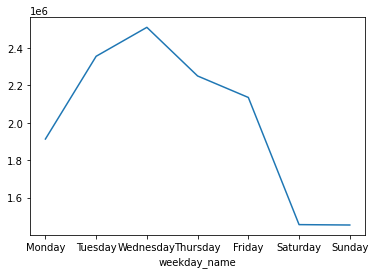

In [47]:
df.groupby('weekday_name').mean().sort_values('weekday_number').volume.plot()

<AxesSubplot:xlabel='weekday_name'>

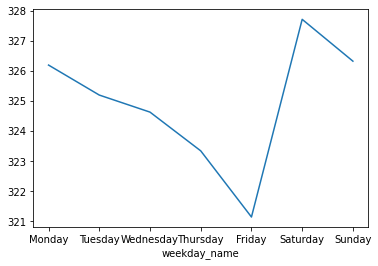

In [48]:
df.groupby('weekday_name').mean().sort_values('weekday_number').close.plot()

### Slicing

In [49]:
#Slicing
df.loc['2019-11-19 12:00:00']

symbol               ETHUSD
close                175.73
volume            422881.86
weekday_name        Tuesday
weekday_number            1
Name: 2019-11-19 12:00:00, dtype: object

In [50]:
df['2018':'2019']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2019-12-31 19:00:00,ETHUSD,131.10,1169847.84,Tuesday,1
2019-12-31 20:00:00,ETHUSD,129.29,428183.38,Tuesday,1
2019-12-31 21:00:00,ETHUSD,128.83,350155.69,Tuesday,1


In [51]:
df['2018-11']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-11-01 00:00:00,ETHUSD,197.77,275748.99,Thursday,3
2018-11-01 01:00:00,ETHUSD,196.79,296047.25,Thursday,3
2018-11-01 02:00:00,ETHUSD,196.66,192362.83,Thursday,3
2018-11-01 03:00:00,ETHUSD,196.65,142273.50,Thursday,3
2018-11-01 04:00:00,ETHUSD,197.02,138478.13,Thursday,3
...,...,...,...,...,...
2018-11-30 19:00:00,ETHUSD,112.55,391218.14,Friday,4
2018-11-30 20:00:00,ETHUSD,112.27,400806.50,Friday,4
2018-11-30 21:00:00,ETHUSD,113.31,956181.40,Friday,4


In [52]:
df['2018-01-01': '2018-06-30']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2018-06-30 19:00:00,ETHUSD,454.25,715461.94,Saturday,5
2018-06-30 20:00:00,ETHUSD,447.32,889070.47,Saturday,5
2018-06-30 21:00:00,ETHUSD,444.99,378183.34,Saturday,5


In [53]:
df = df.drop(columns=['weekday_name', 'weekday_number'])
df.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


### How about changing the period of our data?
#### Downsampling: Reducing Frequency

In [54]:
by_month = df.asfreq('M')
by_month.head()

,symbol,close,volume
date,,,
2017-07-31 11:00:00,ETHUSD,199.96,1058461.41
2017-08-31 11:00:00,ETHUSD,388.19,1189036.71
2017-09-30 11:00:00,ETHUSD,300.37,1002416.23
2017-10-31 11:00:00,ETHUSD,303.45,1014184.66
2017-11-30 11:00:00,ETHUSD,420.42,3367153.22


<AxesSubplot:xlabel='date'>

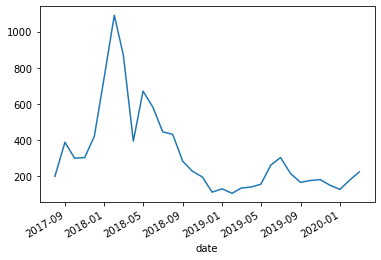

In [55]:
by_month.close.plot()

* #Offset aliases
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
* #Anchored offsets
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets

In [56]:
by_month_first_day = df.asfreq('MS')
by_month_first_day.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-08-01 11:00:00,ETHUSD,228.84,2302367.30
2017-09-01 11:00:00,ETHUSD,391.83,1649221.80
2017-10-01 11:00:00,ETHUSD,300.76,502473.87
2017-11-01 11:00:00,ETHUSD,289.15,1304555.01


<AxesSubplot:xlabel='date'>

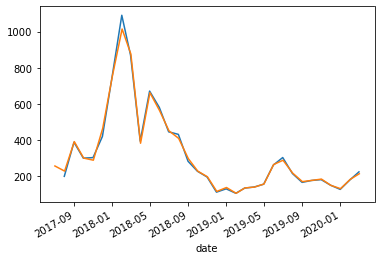

In [59]:
by_month.close.plot(label='Last Day of Month Frequency')
by_month_first_day.close.plot(label='First Day of Month Frequency')

In [60]:
by_half_hour = df.asfreq('30T')
by_half_hour.head(10)

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 11:30:00,NaN,NaN,NaN
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 12:30:00,NaN,NaN,NaN
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 13:30:00,NaN,NaN,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 14:30:00,NaN,NaN,NaN
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


### As freq allows us to fill in the NaNs with two different methods

In [61]:
by_half_hour.assign(
    ffill=lambda df: df.volume.ffill(),
    bfill=lambda df: df.volume.bfill()
).head()

,symbol,close,volume,ffill,bfill
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,679358.87,679358.87
2017-07-01 11:30:00,NaN,NaN,NaN,679358.87,824362.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,824362.87,824362.87
2017-07-01 12:30:00,NaN,NaN,NaN,824362.87,3010787.99
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,3010787.99,3010787.99


In [62]:
by_half_hour = df.asfreq('30T', method='ffill')
by_half_hour.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 11:30:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 12:30:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99


### What about Resampling (Aggregating over time)
* This is similiar to groupby but for dates

In [63]:
daily_df = df.resample('D').mean()
daily_df

,close,volume
date,,
2017-07-01,265.284615,2.198771e+06
2017-07-02,269.782500,2.177595e+06
2017-07-03,278.882083,1.459015e+06
2017-07-04,276.743333,1.254579e+06
2017-07-05,265.025833,1.797923e+06
...,...,...
2020-03-09,200.818333,3.804752e+06
2020-03-10,201.577500,1.553063e+06
2020-03-11,195.910417,1.894868e+06


TypeError: 'module' object is not callable

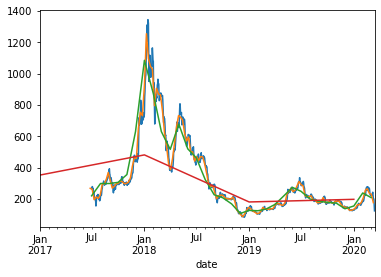

In [64]:
daily_df.close.plot(label='Daily')
df.resample('W').mean().close.plot(label='Weekly')
df.resample('M').mean().close.plot(label='Monthly')
df.resample('Y').mean().close.plot(label='Yearly')
plt.legend()
plt.show()

### Rolling Average/Windows

In [65]:
daily_df.rolling(5).mean().head(10)

,close,volume
date,,
2017-07-01,NaN,NaN
2017-07-02,NaN,NaN
2017-07-03,NaN,NaN
2017-07-04,NaN,NaN
2017-07-05,271.143673,1.777577e+06
2017-07-06,271.382750,1.530363e+06
2017-07-07,268.214667,1.455141e+06
2017-07-08,260.747833,1.434597e+06
2017-07-09,254.361833,1.329570e+06


TypeError: 'module' object is not callable

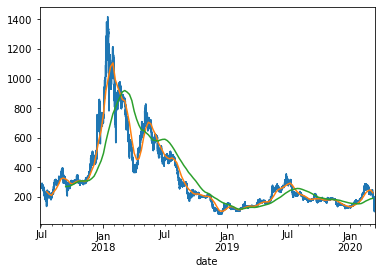

In [67]:
df.close.plot(label='Original Granularity')
df.resample('W').mean().close.rolling(4).mean().plot(label='4 week average')
df.resample('W').mean().close.rolling(12).mean().plot(label='12 week average')
plt.legend()
plt.show()

### How about Lagging or Leading the data?
* .shift: move the data backwards and forwards by a given amount
* .diff: find the difference with the previous observation (or a specified further back observation)

In [68]:
daily_df = daily_df[['volume', 'close']]
daily_df

,volume,close
date,,
2017-07-01,2.198771e+06,265.284615
2017-07-02,2.177595e+06,269.782500
2017-07-03,1.459015e+06,278.882083
2017-07-04,1.254579e+06,276.743333
2017-07-05,1.797923e+06,265.025833
...,...,...
2020-03-09,3.804752e+06,200.818333
2020-03-10,1.553063e+06,201.577500
2020-03-11,1.894868e+06,195.910417


In [69]:
#Allows us to find the difference between one period and the next
daily_df['shift_by_one'] = daily_df.close.shift(1)
daily_df

,volume,close,shift_by_one
date,,,
2017-07-01,2.198771e+06,265.284615,NaN
2017-07-02,2.177595e+06,269.782500,265.284615
2017-07-03,1.459015e+06,278.882083,269.782500
2017-07-04,1.254579e+06,276.743333,278.882083
2017-07-05,1.797923e+06,265.025833,276.743333
...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000
2020-03-10,1.553063e+06,201.577500,200.818333
2020-03-11,1.894868e+06,195.910417,201.577500


In [70]:
#Shift days down
daily_df.close.shift(-1)

date
2017-07-01    269.782500
2017-07-02    278.882083
2017-07-03    276.743333
2017-07-04    265.025833
2017-07-05    266.480000
                 ...    
2020-03-09    201.577500
2020-03-10    195.910417
2020-03-11    152.763333
2020-03-12    124.060476
2020-03-13           NaN
Freq: D, Name: close, Length: 987, dtype: float64

In [71]:
#.diff method
daily_df['diff(1)'] = daily_df.close.diff(1)
daily_df['other_diff'] = daily_df.close - daily_df['shift_by_one']
daily_df

,volume,close,shift_by_one,diff(1),other_diff
date,,,,,
2017-07-01,2.198771e+06,265.284615,NaN,NaN,NaN
2017-07-02,2.177595e+06,269.782500,265.284615,4.497885,4.497885
2017-07-03,1.459015e+06,278.882083,269.782500,9.099583,9.099583
2017-07-04,1.254579e+06,276.743333,278.882083,-2.138750,-2.138750
2017-07-05,1.797923e+06,265.025833,276.743333,-11.717500,-11.717500
...,...,...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000,-21.736667,-21.736667
2020-03-10,1.553063e+06,201.577500,200.818333,0.759167,0.759167
2020-03-11,1.894868e+06,195.910417,201.577500,-5.667083,-5.667083


### How do we calculate ROI?
yearly_rate_return = (where_we_are_today - where_we_were_a_year_ago ) / where_we_were_a_year_ago

Simpler Example
If I buy a rubber ducky for 200 dollars and sell it for 100 dollars after one year, what is my ROI?

In [72]:
where_we_were_a_year_ago = daily_df.close.shift(365)
where_we_were_a_year_ago

date
2017-07-01           NaN
2017-07-02           NaN
2017-07-03           NaN
2017-07-04           NaN
2017-07-05           NaN
                 ...    
2020-03-09    134.920000
2020-03-10    132.684167
2020-03-11    131.779167
2020-03-12    131.479583
2020-03-13    131.275417
Freq: D, Name: close, Length: 987, dtype: float64

In [73]:
daily_df['a_year_ago'] = where_we_were_a_year_ago
daily_df

,volume,close,shift_by_one,diff(1),other_diff,a_year_ago
date,,,,,,
2017-07-01,2.198771e+06,265.284615,NaN,NaN,NaN,NaN
2017-07-02,2.177595e+06,269.782500,265.284615,4.497885,4.497885,NaN
2017-07-03,1.459015e+06,278.882083,269.782500,9.099583,9.099583,NaN
2017-07-04,1.254579e+06,276.743333,278.882083,-2.138750,-2.138750,NaN
2017-07-05,1.797923e+06,265.025833,276.743333,-11.717500,-11.717500,NaN
...,...,...,...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000,-21.736667,-21.736667,134.920000
2020-03-10,1.553063e+06,201.577500,200.818333,0.759167,0.759167,132.684167
2020-03-11,1.894868e+06,195.910417,201.577500,-5.667083,-5.667083,131.779167


In [74]:
where_we_were_a_year_ago = daily_df.close.shift(365)
where_we_are_today = daily_df.close

roi_series = ((where_we_are_today - where_we_were_a_year_ago) / where_we_were_a_year_ago) * 100
roi_series

date
2017-07-01          NaN
2017-07-02          NaN
2017-07-03          NaN
2017-07-04          NaN
2017-07-05          NaN
                ...    
2020-03-09    48.842524
2020-03-10    51.922799
2020-03-11    48.665697
2020-03-12    16.187875
2020-03-13    -5.496033
Freq: D, Name: close, Length: 987, dtype: float64

### Time Zones
Timestamp with no timezone

In [75]:
t = pd.Timestamp('2020-04-14 10:25:25')
t

Timestamp('2020-04-14 10:25:25')

### Specifying the timezone

In [76]:
t1 = pd.Timestamp('2020-04-14 10:25:25', tz='Us/Central')
t1

Timestamp('2020-04-14 10:25:25-0500', tz='US/Central')

### Convert to a different timezone

In [78]:
t1 = t1.tz_convert(tz='Asia/tokyo')
t1

Timestamp('2020-04-15 00:25:25+0900', tz='Asia/Tokyo')

### Timedelta

In [80]:
#represents an amount of time that has passed
t
t + pd.Timedelta('1d')

Timestamp('2020-04-15 10:25:25')

### What if I need the time right now?

In [81]:
now = pd.Timestamp.now()
now

Timestamp('2022-12-05 11:55:20.087103')

### Now let's do some time math!

In [82]:
time_since_t = now - t
time_since_t

Timedelta('965 days 01:29:55.087103')

In [83]:
time_since_t.days

965

### but if we want total seconds then we need to do the math

In [84]:
days_in_seconds = time_since_t.days * 24 * 60 * 60

seconds_in_timepart = time_since_t.seconds

days_in_seconds + seconds_in_timepart


83381395

### So know timedelta math becomes the simplier way

In [85]:
time_since_t // pd.Timedelta('1s')

83381395

---

# Exercises

In [100]:
temps = data.sf_temps()

## Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [101]:
#Making date time index
temps = temps.set_index('date').sort_index()
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [102]:
#Min and Max
temps.index.min(), temps.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

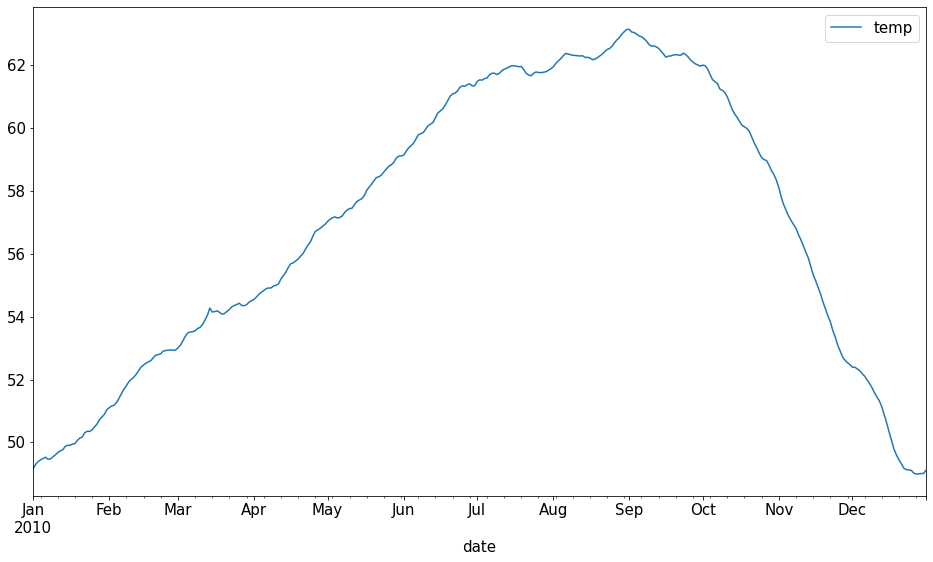

In [103]:
temps.resample('D').mean() # Temperature by day
temps.resample('D').mean().plot(label='Daily')

### 2. Write the code necessary to visualize the minimum temperature over time.

TypeError: 'module' object is not callable

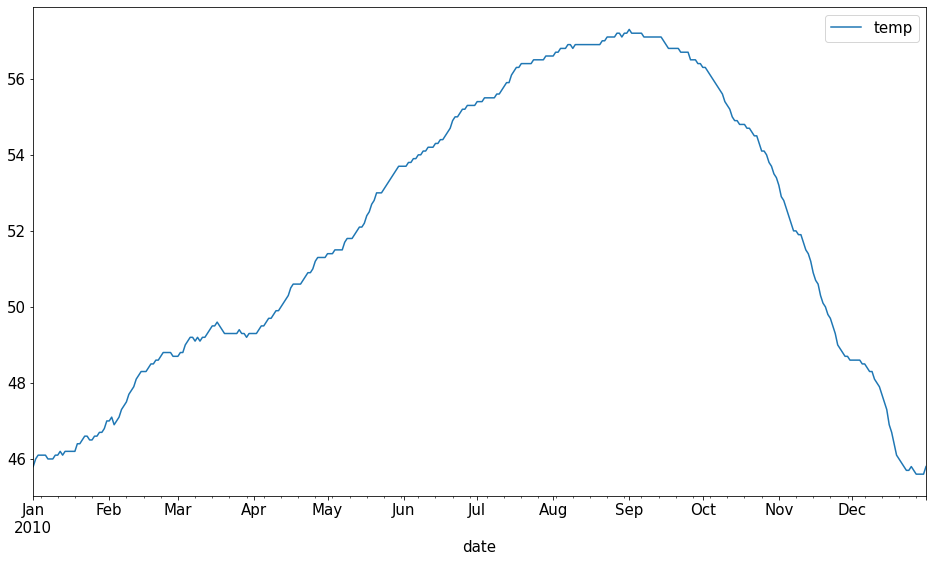

In [104]:
temps.resample('D').min().plot(label='min temp per day')
plt.legend()
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

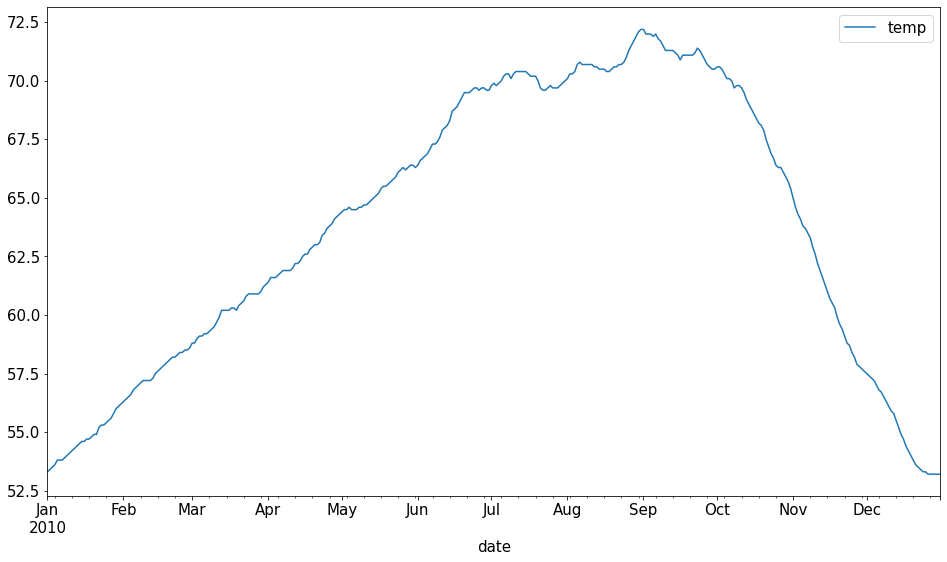

In [106]:
temps.resample('D').max().plot(label='max temp per day')

### 4. Which month is the coldest, on average?

In [110]:
temps['month'] = temps.index.month_name()

In [111]:
temps.head(2)

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January


In [112]:
#January is the coldest month
temps.groupby('month').mean().sort_values('temp').head()

,temp
month,
January,49.984140
December,50.498253
February,52.243899
March,53.956528
November,55.185139


### 5. Which month has the highest average temperature?

In [113]:
#September is the hottest month
temps.groupby('month').mean().sort_values('temp', ascending=False).head()

,temp
month,
September,62.487083
August,62.405376
July,61.765457
June,60.444722
October,60.253091


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability? Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [114]:
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [115]:
days = temps.resample('D').agg(['min', 'max']).temp
days

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [116]:
days['temp_diff'] = days['max'] - days['min']
days

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [117]:
days['month'] = days.index.month_name()

In [118]:
days.head(2)

,min,max,temp_diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January
2010-01-02,46.0,53.4,7.4,January


In [120]:
#August has the highest difference in temperatures
days.groupby('month').max().sort_values('temp_diff', ascending=False)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0
September,57.3,72.2,14.9
July,56.6,70.4,14.8
June,55.3,69.7,14.8
October,56.3,70.6,14.4
May,53.7,66.4,13.1
April,51.3,64.3,13.0
March,49.6,61.3,12.0
November,53.2,65.0,11.8
